In [9]:
import numpy as np
import sacpy as scp
import matplotlib.pyplot as plt

In [10]:
# load sst
sst = scp.load_sst()['sst']
sst

<xarray.DataArray 'sst' (time: 376, lat: 30, lon: 141)>
[1590480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1991-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 20.0 22.0 24.0 26.0 28.0 ... 294.0 296.0 298.0 300.0
  * lat      (lat) float64 -29.0 -27.0 -25.0 -23.0 -21.0 ... 23.0 25.0 27.0 29.0

In [11]:
# get ssta
ssta = scp.get_anom(sst,method=1)
# ssta[0].plot()

In [12]:
# calculate Nino3.4
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))

In [13]:
linreg = scp.LinReg(Nino34,ssta)

In [14]:
print(linreg)

LinReg, x.shape = (376,), y.shape = (376, 30, 141) 


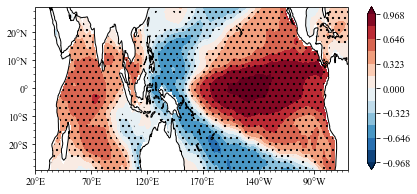

In [15]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,linreg.corr)
n = ax.sig_plot(lon,lat,linreg.p_value,color="k",marker="..")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)
plt.savefig("../pic/nino34.png",dpi=200)

In [11]:
import scipy.stats as sts


def for_loop_reg(nino34, ssta):
    rvalue = np.zeros_like(ssta[0])
    p = np.zeros_like(ssta[0])
    for i in range(rvalue.shape[0]):
        for j in range(rvalue.shape[1]):
            res = sts.linregress(nino34, ssta[:, i, j])
            rvalue[i, j], p[i, j] = res.rvalue, res.pvalue
    return rvalue, p

rvalue, p = for_loop_reg(np.array(Nino34), np.array(ssta))

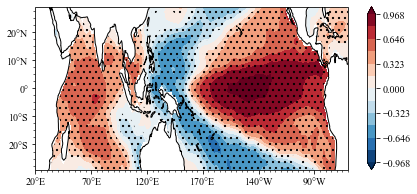

In [12]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,rvalue)
n = ax.sig_plot(lon,lat,p,color="k",marker="..")
ax.init_map(stepx=50, ysmall=2.5)
plt.colorbar(m)

In [8]:
# linear regression (ssta pattern ssta)
%time for i in range(10): linreg = scp.LinReg(np.array(Nino34),np.array(ssta))

CPU times: user 938 ms, sys: 844 ms, total: 1.78 s
Wall time: 376 ms


In [12]:
%time for i in range(10): rvalue, p = for_loop_reg(np.array(Nino34), np.array(ssta))

CPU times: user 21.1 s, sys: 0 ns, total: 21.1 s
Wall time: 21.2 s


## sacpy
wall time : 376 ms

## for_loop
Wall time: 21.2 s